In [2]:
import pandas as pd 

caminho = '/content/drive/MyDrive/Cópia de base_dados.xlsx'
vendas = pd.read_excel(caminho, sheet_name='Vendas')
display(vendas)



,Data,Loja,Produto,Quantidade
0,2017-05-27 00:00:00,Avenida 44,Short,2
1,2019-11-04 00:00:00,Avenida 44,Relógio,5
2,2019-06-18 00:00:00,Shopping Flamboyant,Calça,2
3,2020-04-18 00:00:00,Shopping Bougainville,Meia,1
4,2018-06-12 00:00:00,Avenida 85,Camisa,2
...,...,...,...,...
1048570,2010-05-29 00:00:00,Avenida 44,Chinelo,6
1048571,2015-02-18 00:00:00,Avenida 85,Calcinha,6
1048572,2014-01-05 00:00:00,Avenida 44,Camiseta,2
1048573,2019-08-02 00:00:00,Avenida Anhanguera,Meia,4


In [3]:
produtos = pd.read_excel(caminho, sheet_name='Produtos')
display(produtos)

,Produto,Valor Unitário (US$),Custo Unitário (US$)
0,Short,12,3.26
1,Relógio,45,11.99
2,Calça,30,7.46
3,Meia,5,1.53
4,Camisa,25,8.78
5,Tênis,35,9.89
6,Chinelo,8,2.58
7,Camiseta,30,7.27
8,Sapato,40,18.39
9,Bermuda,15,3.91


In [4]:
emails = pd.read_excel(caminho, sheet_name='E-mails')
display(emails)

,Loja,E-mail
0,Avenida 44,ff.python1@gmail.com
1,Avenida 85,ff.python2@gmail.com
2,Avenida Anhanguera,ff.python5@gmail.com
3,Goiânia Shopping,ff.python6@gmail.com
4,Shopping Passeio das Águas,ff.python7@gmail.com
5,Shopping Flamboyant,ff.python8@gmail.com
6,Shopping Bougainville,ff.python9@gmail.com


In [5]:
#obter informações da base de dados
vendas.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Data        1048572 non-null  object
 1   Loja        1048573 non-null  object
 2   Produto     1048562 non-null  object
 3   Quantidade  1048575 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [6]:
#alterar o formato da coluna Data

vendas['Data'] = pd.to_datetime(vendas['Data'], 
                                format = '%Y-%m-%d %H:%M:%S',
                                errors = 'coerce')

#apagar as linhas que possuem dados nulos

vendas = vendas.dropna()
display(vendas)

,Data,Loja,Produto,Quantidade
0,2017-05-27,Avenida 44,Short,2
1,2019-11-04,Avenida 44,Relógio,5
2,2019-06-18,Shopping Flamboyant,Calça,2
3,2020-04-18,Shopping Bougainville,Meia,1
4,2018-06-12,Avenida 85,Camisa,2
...,...,...,...,...
1048570,2010-05-29,Avenida 44,Chinelo,6
1048571,2015-02-18,Avenida 85,Calcinha,6
1048572,2014-01-05,Avenida 44,Camiseta,2
1048573,2019-08-02,Avenida Anhanguera,Meia,4


In [7]:
#calcular o lucro de cada produto

produtos['Lucro'] = produtos['Valor Unitário (US$)'] - produtos['Custo Unitário (US$)']
display(produtos)

,Produto,Valor Unitário (US$),Custo Unitário (US$),Lucro
0,Short,12,3.26,8.74
1,Relógio,45,11.99,33.01
2,Calça,30,7.46,22.54
3,Meia,5,1.53,3.47
4,Camisa,25,8.78,16.22
5,Tênis,35,9.89,25.11
6,Chinelo,8,2.58,5.42
7,Camiseta,30,7.27,22.73
8,Sapato,40,18.39,21.61
9,Bermuda,15,3.91,11.09


In [8]:
#agrupar as tabelas vendas e produtos em uma nova tabela chamada venda

venda = vendas.merge(produtos, how='outer', on='Produto')

#atualizar dados na nova tabela
venda = venda.rename(columns={'Valor Unitário (US$)':'Valor Total','Custo Unitário (US$)': 'Custo Total'})
venda['Valor Total'] = venda['Quantidade'] * venda['Valor Total']
venda['Custo Total'] = venda['Quantidade'] * venda['Custo Total']
venda['Lucro'] = venda['Quantidade'] * venda['Lucro']
display(venda)

,Data,Loja,Produto,Quantidade,Valor Total,Custo Total,Lucro
0,2017-05-27,Avenida 44,Short,2,24,6.52,17.48
1,2015-06-07,Avenida Anhanguera,Short,1,12,3.26,8.74
2,2018-03-23,Shopping Passeio das Águas,Short,5,60,16.30,43.70
3,2016-03-18,Avenida 44,Short,2,24,6.52,17.48
4,2013-09-02,Avenida 44,Short,5,60,16.30,43.70
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,15,5.07,9.93
1048509,2017-07-16,Goiânia Shopping,Cueca,1,5,1.69,3.31
1048510,2017-10-26,Avenida 44,Cueca,5,25,8.45,16.55
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,20,6.76,13.24


In [12]:
#web scraping

import requests
from bs4 import BeautifulSoup

url = 'https://br.investing.com/currencies/usd-brl'
pagina = requests.get(url)
sopa = BeautifulSoup(pagina.content, 'html.parser')

#pegar cotação do dólar em tempo real

elemento = sopa.find('span', class_= 'text-2xl')
cotacao_dolar = elemento.getText()
cotacao_dolar = cotacao_dolar.replace(',', '.')
cotacao_dolar = float(cotacao_dolar)
print(cotacao_dolar)

5.2102


In [13]:
#atualizar dados da tabela venda

venda[['Valor Total', 'Custo Total', 'Lucro']] = venda[['Valor Total', 'Custo Total', 'Lucro']] * cotacao_dolar
display(venda)

,Data,Loja,Produto,Quantidade,Valor Total,Custo Total,Lucro
0,2017-05-27,Avenida 44,Short,2,125.0448,33.970504,91.074296
1,2015-06-07,Avenida Anhanguera,Short,1,62.5224,16.985252,45.537148
2,2018-03-23,Shopping Passeio das Águas,Short,5,312.6120,84.926260,227.685740
3,2016-03-18,Avenida 44,Short,2,125.0448,33.970504,91.074296
4,2013-09-02,Avenida 44,Short,5,312.6120,84.926260,227.685740
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,78.1530,26.415714,51.737286
1048509,2017-07-16,Goiânia Shopping,Cueca,1,26.0510,8.805238,17.245762
1048510,2017-10-26,Avenida 44,Cueca,5,130.2550,44.026190,86.228810
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,104.2040,35.220952,68.983048


In [17]:
#agrupar base de dados por loja

vendas_por_loja = venda.groupby('Loja').sum()
#formatação apenas visual
pd.options.display.float_format = 'R$ {:,.2f}'.format
display(vendas_por_loja)



,Quantidade,Valor Total,Custo Total,Lucro
Loja,,,,
Avenida 44,684989,"R$ 82,378,758.76","R$ 24,317,648.42","R$ 58,061,110.34"
Avenida 85,237822,"R$ 26,725,356.19","R$ 8,039,213.97","R$ 18,686,142.21"
Avenida Anhanguera,413549,"R$ 48,698,603.58","R$ 14,634,314.26","R$ 34,064,289.32"
Goiânia Shopping,463001,"R$ 50,020,842.92","R$ 15,173,576.73","R$ 34,847,266.19"
Shopping Bougainville,146685,"R$ 16,280,067.06","R$ 4,896,713.62","R$ 11,383,353.44"
Shopping Flamboyant,576562,"R$ 67,752,086.15","R$ 20,783,798.85","R$ 46,968,287.30"
Shopping Passeio das Águas,484902,"R$ 53,285,507.35","R$ 16,216,570.56","R$ 37,068,936.79"


In [20]:
#calcular indicador ticket médio

vendas_por_loja['Ticket Médio'] = vendas_por_loja['Lucro'] / vendas_por_loja['Quantidade']
display(vendas_por_loja)

,Quantidade,Valor Total,Custo Total,Lucro,Ticket Médio
Loja,,,,,
Avenida 44,684989,"R$ 82,378,758.76","R$ 24,317,648.42","R$ 58,061,110.34",R$ 84.76
Avenida 85,237822,"R$ 26,725,356.19","R$ 8,039,213.97","R$ 18,686,142.21",R$ 78.57
Avenida Anhanguera,413549,"R$ 48,698,603.58","R$ 14,634,314.26","R$ 34,064,289.32",R$ 82.37
Goiânia Shopping,463001,"R$ 50,020,842.92","R$ 15,173,576.73","R$ 34,847,266.19",R$ 75.26
Shopping Bougainville,146685,"R$ 16,280,067.06","R$ 4,896,713.62","R$ 11,383,353.44",R$ 77.60
Shopping Flamboyant,576562,"R$ 67,752,086.15","R$ 20,783,798.85","R$ 46,968,287.30",R$ 81.46
Shopping Passeio das Águas,484902,"R$ 53,285,507.35","R$ 16,216,570.56","R$ 37,068,936.79",R$ 76.45


In [22]:
#calcular os produtos mais vendidos de cada loja

lista_produtos_1=[]
lista_produtos_2=[]
lista_produtos_3=[]

for loja in vendas_por_loja.index:
  df_loja = venda.loc[venda['Loja'] == loja]
  df_produto = df_loja.groupby('Produto').sum()
  df_produto = df_produto.sort_values('Quantidade', ascending = False)
  lista_produtos_1.append(df_produto.index[0])
  lista_produtos_2.append(df_produto.index[1])
  lista_produtos_3.append(df_produto.index[2])

vendas_por_loja['Primeiro Produto Mais Vendido'] = lista_produtos_1
vendas_por_loja['Segundo Produto Mais Vendido'] = lista_produtos_2
vendas_por_loja['Terceiro Produto Mais Vendido'] = lista_produtos_3
display(vendas_por_loja)

,Quantidade,Valor Total,Custo Total,Lucro,Ticket Médio,Primeiro Produto Mais Vendido,Segundo Produto Mais Vendido,Terceiro Produto Mais Vendido
Loja,,,,,,,,
Avenida 44,684989,"R$ 82,378,758.76","R$ 24,317,648.42","R$ 58,061,110.34",R$ 84.76,Camiseta,Camisa,Calça
Avenida 85,237822,"R$ 26,725,356.19","R$ 8,039,213.97","R$ 18,686,142.21",R$ 78.57,Camisa,Calcinha,Camiseta
Avenida Anhanguera,413549,"R$ 48,698,603.58","R$ 14,634,314.26","R$ 34,064,289.32",R$ 82.37,Camisa,Tênis,Calcinha
Goiânia Shopping,463001,"R$ 50,020,842.92","R$ 15,173,576.73","R$ 34,847,266.19",R$ 75.26,Camisa,Calcinha,Camiseta
Shopping Bougainville,146685,"R$ 16,280,067.06","R$ 4,896,713.62","R$ 11,383,353.44",R$ 77.60,Camisa,Camiseta,Calcinha
Shopping Flamboyant,576562,"R$ 67,752,086.15","R$ 20,783,798.85","R$ 46,968,287.30",R$ 81.46,Camisa,Calça,Calcinha
Shopping Passeio das Águas,484902,"R$ 53,285,507.35","R$ 16,216,570.56","R$ 37,068,936.79",R$ 76.45,Camisa,Calcinha,Camiseta


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


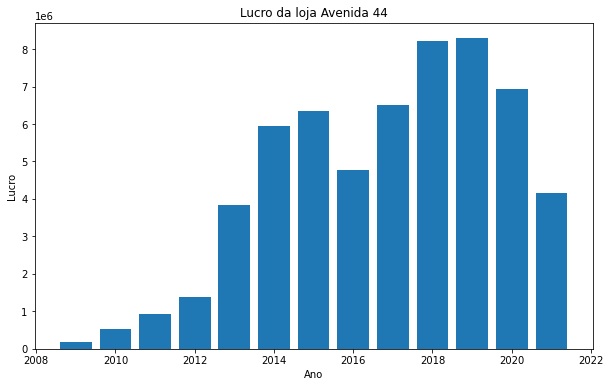

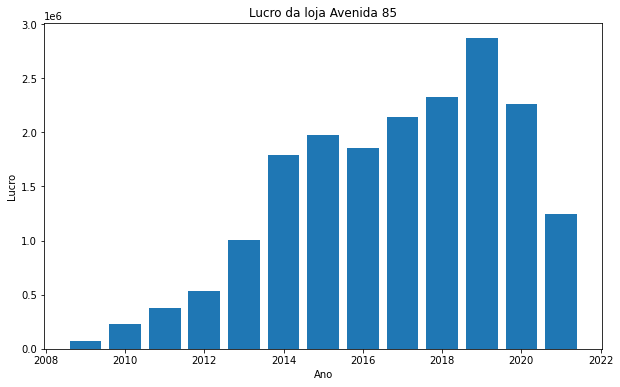

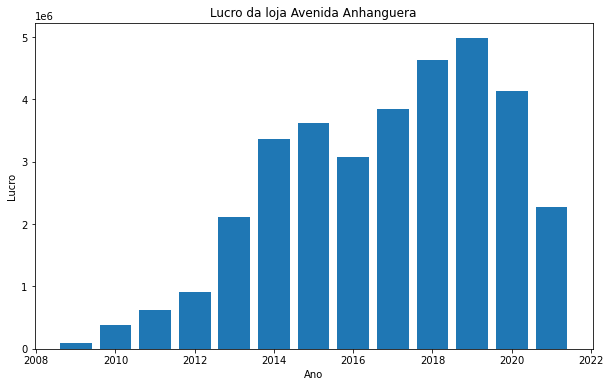

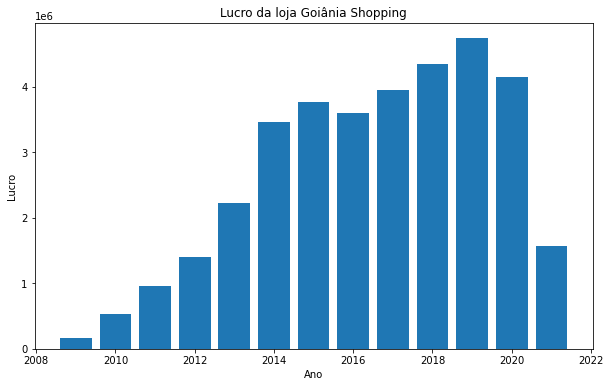

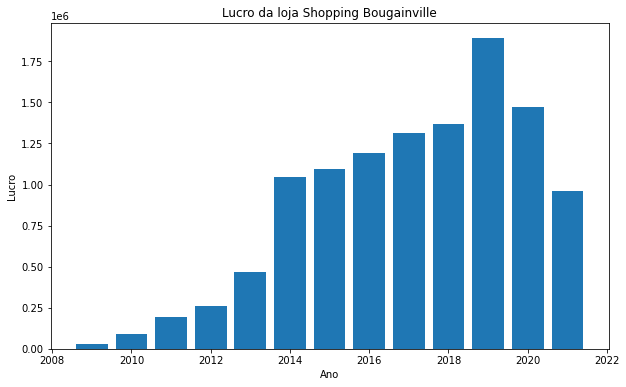

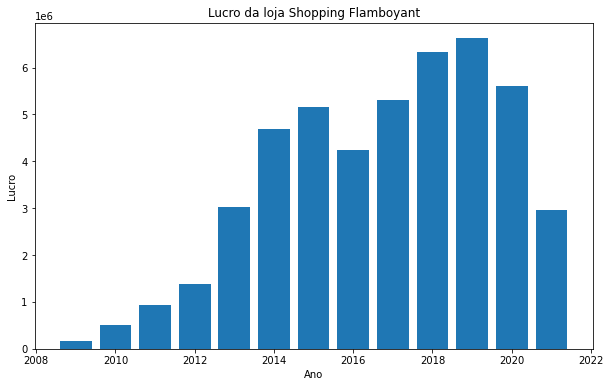

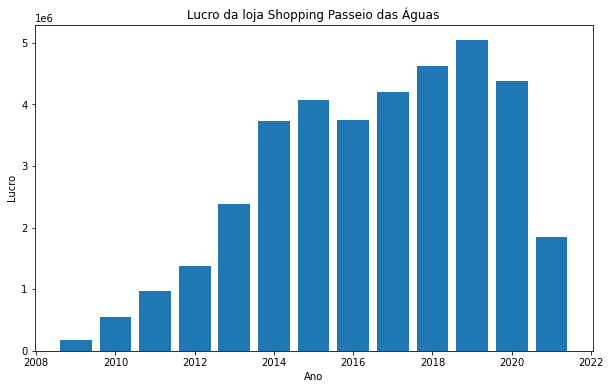

In [31]:
#criar gráficos de vendas

import matplotlib.pyplot as plt

graficos = []

for loja in vendas_por_loja.index:
  #filtrar loja
  df_loja = venda.loc[venda['Loja'] == loja]
  #separar ano da venda
  df_loja['Ano'] = df_loja['Data'].dt.year
  #agruprar por ano
  df_ano = df_loja.groupby('Ano').sum()
  #fazer gráfico de barras
  fig = plt.figure(figsize=(10, 6))
  plt.bar(x=df_ano.index, height=df_ano['Lucro'])
  #personalizar gráfico
  plt.title(f'Lucro da loja {loja}')
  plt.xlabel('Ano')
  plt.ylabel('Lucro')
  #adicionar à lista
  graficos.append(fig)

#adicionar à tabela
vendas_por_loja['Gráficos'] = graficos

In [64]:
#criar tabela ranking

vendas_final = vendas_por_loja.drop('Gráficos', axis = 1)
ranking = vendas_final.sort_values('Quantidade', ascending = False)

#formatação em moeda brasileira

def formata_moeda(numero):
  return str(f'R$ {numero:,.2f}').replace('.',';').replace(',','.').replace(';',',')

ranking['Valor Total'] = [formata_moeda(valor) for valor in ranking['Valor Total']]
ranking['Custo Total'] = [formata_moeda(valor) for valor in ranking['Custo Total']]
ranking['Lucro'] = [formata_moeda(valor) for valor in ranking['Lucro']]
ranking['Ticket Médio'] = [formata_moeda(valor) for valor in ranking['Ticket Médio']]

display(ranking)

,Quantidade,Valor Total,Custo Total,Lucro,Ticket Médio,Primeiro Produto Mais Vendido,Segundo Produto Mais Vendido,Terceiro Produto Mais Vendido
Loja,,,,,,,,
Avenida 44,684989,"R$ 82.378.758,76","R$ 24.317.648,42","R$ 58.061.110,34","R$ 84,76",Camiseta,Camisa,Calça
Shopping Flamboyant,576562,"R$ 67.752.086,15","R$ 20.783.798,85","R$ 46.968.287,30","R$ 81,46",Camisa,Calça,Calcinha
Shopping Passeio das Águas,484902,"R$ 53.285.507,35","R$ 16.216.570,56","R$ 37.068.936,79","R$ 76,45",Camisa,Calcinha,Camiseta
Goiânia Shopping,463001,"R$ 50.020.842,92","R$ 15.173.576,73","R$ 34.847.266,19","R$ 75,26",Camisa,Calcinha,Camiseta
Avenida Anhanguera,413549,"R$ 48.698.603,58","R$ 14.634.314,26","R$ 34.064.289,32","R$ 82,37",Camisa,Tênis,Calcinha
Avenida 85,237822,"R$ 26.725.356,19","R$ 8.039.213,97","R$ 18.686.142,21","R$ 78,57",Camisa,Calcinha,Camiseta
Shopping Bougainville,146685,"R$ 16.280.067,06","R$ 4.896.713,62","R$ 11.383.353,44","R$ 77,60",Camisa,Camiseta,Calcinha


In [ ]:
pip install redmail

In [65]:
#configurar email
from redmail import EmailSender

remetente = 'email@gmail.com'
senha = 'senha'

email = EmailSender(host='smtp.gmail.com',
                    port=587,
                    username=remetente,
                    password=senha)

#corpo do email
corpo='''
<h1>Resultados da loja {{ loja }}</h1>

<h2>Resumo dos resultados para a loja <i>{{ loja }}</i> da companhia:</p>

<ul>
    <li>Faturamento total de <b>{{ faturamento }}</b></li>
    <li><b>{{ quantidade }}</b> peças vendidas</li>
    <li>Ticket Médio de <b>{{ ticket_medio}}</b></li>
    <li><b>{{ produto_mais_vendido_1 }}</b> foi o produto mais vendido</li>
    <li><b>{{ produto_mais_vendido_2 }}</b> foi o segundo produto mais vendido</li>
    <li><b>{{ produto_mais_vendido_3 }}</b> foi o terceiro produto mais vendido</li>
</ul>

<p>Segue o ranking de vendas de todas as lojas:</p>

{{ ranking}}

<p>E os resultados da loja {{ loja }} ao longo do período:</p>

{{ grafico }}

<p>Att.</p>
'''
  
#loop de repetição de envio de email para cada loja

for i, loja in enumerate(vendas_por_loja.index):
  destinatario = emails['E-mail'][i]
  assunto = f'Resultados da loja {loja}'
  grafico = vendas_por_loja['Gráficos'][i]
  quantidade = vendas_por_loja['Quantidade'][i]
  faturamento = formata_moeda(vendas_por_loja['Lucro'][i])
  ticket_medio = formata_moeda(vendas_por_loja['Ticket Médio'][i])
  produto_mais_vendido_1 = vendas_por_loja['Primeiro Produto Mais Vendido'][i]
  produto_mais_vendido_2 = vendas_por_loja['Segundo Produto Mais Vendido'][i]
  produto_mais_vendido_3 = vendas_por_loja['Terceiro Produto Mais Vendido'][i]
  email.send(
      subject = assunto,
      sender = remetente,
      receivers = destinatario,
      html = corpo,
      body_params = {'loja': loja,
                     'faturamento': faturamento,
                     'quantidade': quantidade,
                     'ticket_medio':ticket_medio,
                     'produto_mais_vendido_1':produto_mais_vendido_1,
                     'produto_mais_vendido_2':produto_mais_vendido_2,
                     'produto_mais_vendido_3':produto_mais_vendido_3},
      body_images = {'grafico': grafico},
      body_tables = {'ranking': ranking}
  )                                                                       
                                                                            
